### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

##### 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])


In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [48]:
lambdas = [10**x for x in range(-8, 0)]
lambdas

[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]

In [49]:
W_by_lambda = [gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=lambda_) for lambda_ in lambdas]

Iter: 0, weights: [ 1.21455793 -0.64394613  1.13170206  2.55520641], error 3235.2245640455867
Iter: 500, weights: [23.10066359  5.11252771 -6.99893934 19.29719109], error 40.174302797868
Iter: 1000, weights: [27.96659581  6.08814356 -5.98645619 16.54585998], error 33.34760358752556
Iter: 1500, weights: [31.46944763  6.21250653 -4.67282772 14.54639765], error 29.717622113911005
Iter: 2000, weights: [34.09690919  6.24219844 -3.623144   13.04454223], error 27.64997657534383
Iter: 2500, weights: [36.07939438  6.2578867  -2.8243373  11.91113585], error 26.47061446500435
Iter: 3000, weights: [37.57645871  6.2690287  -2.22040897 11.05522638], error 25.79789813393642
Iter: 3500, weights: [38.70708887  6.27736955 -1.76422845 10.40881417], error 25.41417334350586
Iter: 4000, weights: [39.56098995  6.28366117 -1.41969324  9.92061529], error 25.19529059386527
Iter: 4500, weights: [40.2058946   6.28841207 -1.15948387  9.55190543], error 25.070434936031965
Final MSE: 24.999213363960994
Iter: 0, weig

In [50]:
W_y = dict()
for i in range(4):
    W_y[i] = [W_by_lambda[y][i] for y in range(len(lambdas))]

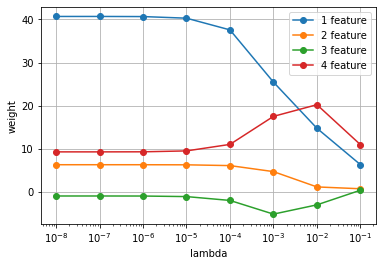

In [51]:
plt.xscale('log')
plt.grid()
for i in range(4):
    plt.plot(lambdas, W_y[i], 'o-')
plt.xlabel("lambda")
plt.ylabel("weight")
plt.legend([f'{i} feature' for i in range(1, 5)])
plt.show()

Оптимальное значение коэффициента регуляризации находится в диапазоне от $10^{-8}$ до $10^{-4}$

##### 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [56]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [57]:
W_by_lambda = [gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=lambda_) for lambda_ in lambdas]

Iter: 0, weights: [0.98049699 0.03832024 0.46687552 1.7274023 ], error 3453.0593601307983
Iter: 500, weights: [23.10897965  5.18526971 -7.06912572 19.29481166], error 40.12966056065365
Iter: 1000, weights: [27.95960742  6.09572845 -5.99700663 16.55010865], error 33.357769272466534
Iter: 1500, weights: [31.46283117  6.21327307 -4.67632661 14.55021117], error 29.7237640235601
Iter: 2000, weights: [34.09183608  6.24226103 -3.62529641 13.04745004], error 27.653437902854755
Iter: 2500, weights: [36.07562781  6.2578839  -2.82588665 11.91329423], error 26.472548727494747
Iter: 3000, weights: [37.57370014  6.26902546 -2.22154365 11.05680821], error 25.79896822917657
Iter: 3500, weights: [38.70509868  6.27737115 -1.76505227 10.40995665], error 25.414756991317457
Iter: 4000, weights: [39.5595845   6.28366699 -1.42028103  9.92142346], error 25.19560237198387
Iter: 4500, weights: [40.20493403  6.28842116 -1.15989215  9.55245925], error 25.07059627395683
Final MSE: 24.999292621779734
Iter: 0, weigh

##### 3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нет. Нормализация и стандартизация масштабируют и смещают признаки. В случае нормализации они расположены в промежутке [0, 1], а в случае стандартизации медиана признаков находится в 0.

##### 4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

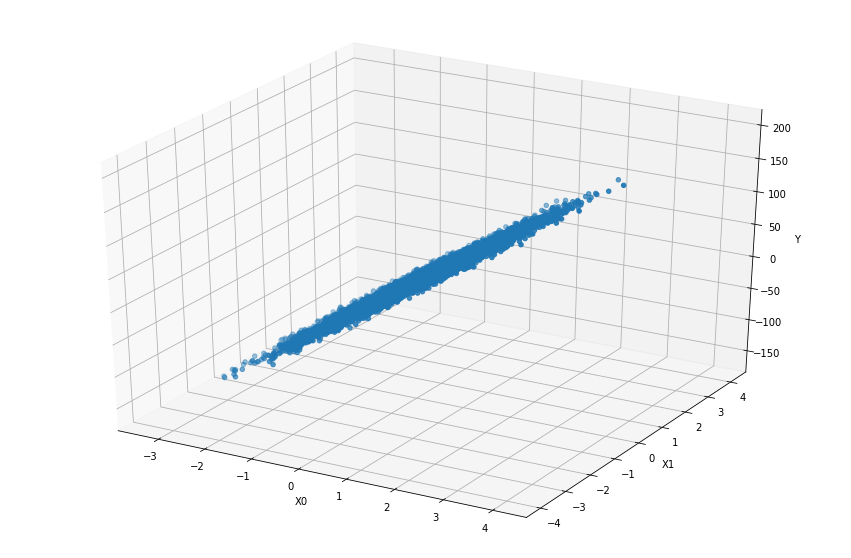

In [84]:
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# generate regression dataset
X, Y, coef = make_regression(n_samples=10000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=3, coef=True, random_state=2)
# plot regression dataset
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [99]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    # список значений ошибок после каждой итерации
    errors = []
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        errors.append(err)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return errors

In [103]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    # список значений ошибок после каждой итерации
    errors = []
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)

            dQ = 2/n * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
            errors.append(err)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return errors

In [104]:
err_gd = gradient_descent(X, Y, iterations=5000, eta=1e-2)


Iter: 0, weights: [0.51587463 0.29263929], error 2285.82163942046
Iter: 500, weights: [47.47112177  1.64644279], error 9.063613605840581
Iter: 1000, weights: [47.4732565   1.64624628], error 9.063608878457844
Iter: 1500, weights: [47.4732566   1.64624626], error 9.063608878457835
Iter: 2000, weights: [47.4732566   1.64624626], error 9.063608878457835
Iter: 2500, weights: [47.4732566   1.64624626], error 9.063608878457835
Iter: 3000, weights: [47.4732566   1.64624626], error 9.063608878457835
Iter: 3500, weights: [47.4732566   1.64624626], error 9.063608878457835
Iter: 4000, weights: [47.4732566   1.64624626], error 9.063608878457835
Iter: 4500, weights: [47.4732566   1.64624626], error 9.063608878457835
Final MSE: 9.063608878457835


In [105]:
err_sgd = stohastic_gradient_descent(X, Y, iterations=50000, batch_size = 2500, eta=1e-2)

amount of batches is 4
Iter: 0, weights: [-0.39794797 -0.65484863], error 2294.034506007913
Iter: 5000, weights: [47.47305191  1.6458566 ], error 8.912082679435684
Iter: 10000, weights: [47.47305191  1.6458566 ], error 8.912082679435684
Iter: 15000, weights: [47.47305191  1.6458566 ], error 8.912082679435684
Iter: 20000, weights: [47.47305191  1.6458566 ], error 8.912082679435684
Iter: 25000, weights: [47.47305191  1.6458566 ], error 8.912082679435684
Iter: 30000, weights: [47.47305191  1.6458566 ], error 8.912082679435684
Iter: 35000, weights: [47.47305191  1.6458566 ], error 8.912082679435684
Iter: 40000, weights: [47.47305191  1.6458566 ], error 8.912082679435684
Iter: 45000, weights: [47.47305191  1.6458566 ], error 8.912082679435684
Final MSE: 9.0636090778926


Text(0, 0.5, 'MSE')

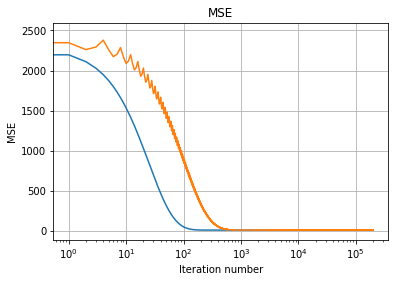

In [112]:
# Визуализируем изменение функционала ошибки
plt.xscale('log')
plt.grid()
plt.plot(range(len(err_gd)), err_gd)
plt.plot(range(len(err_sgd)), err_sgd)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Скорость сходимости градиентного спуска быстрее, чем у стохастического градиентного спуска